In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#import data
data = pd.read_csv("/content/Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


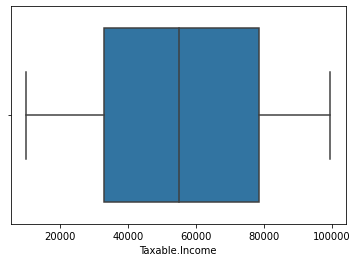

In [6]:
import seaborn as sns
sns.boxplot (data['Taxable.Income'])
# There is no outlier

In [7]:
data1 =data.copy()

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data1['Undergrad'] = le.fit_transform(data1['Undergrad'])
data1['Urban'] = le.fit_transform(data1['Urban'])
data1['Marital.Status'] = le.fit_transform(data1['Marital.Status'])
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
data1['fraud']=pd.cut(data1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,0,2,68833,50047,10,1,good
1,1,0,33700,134075,18,1,good
2,0,1,36925,160205,30,1,good
3,1,2,50190,193264,15,1,good
4,0,1,81002,27533,28,0,good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,good
596,1,0,69967,55369,2,1,good
597,0,0,47334,154058,0,1,good
598,1,1,98592,180083,17,0,good


In [10]:
#data1.insert(6,'tax_class'," ")

#for i in range(0,len(data1['Taxable.Income']),1):
#    if data1['Taxable.Income'].iloc[i]<=30000:
#        data1['tax_class'].iloc[i]='Risky'
#    else:
#        data1['tax_class'].iloc[i]='Good'

In [11]:
data1.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


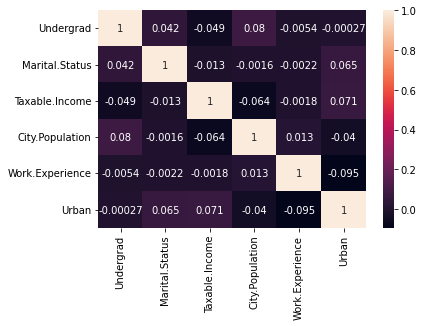

In [12]:
sns.heatmap((data1.corr()), annot=True)
#there is no multi collinearity

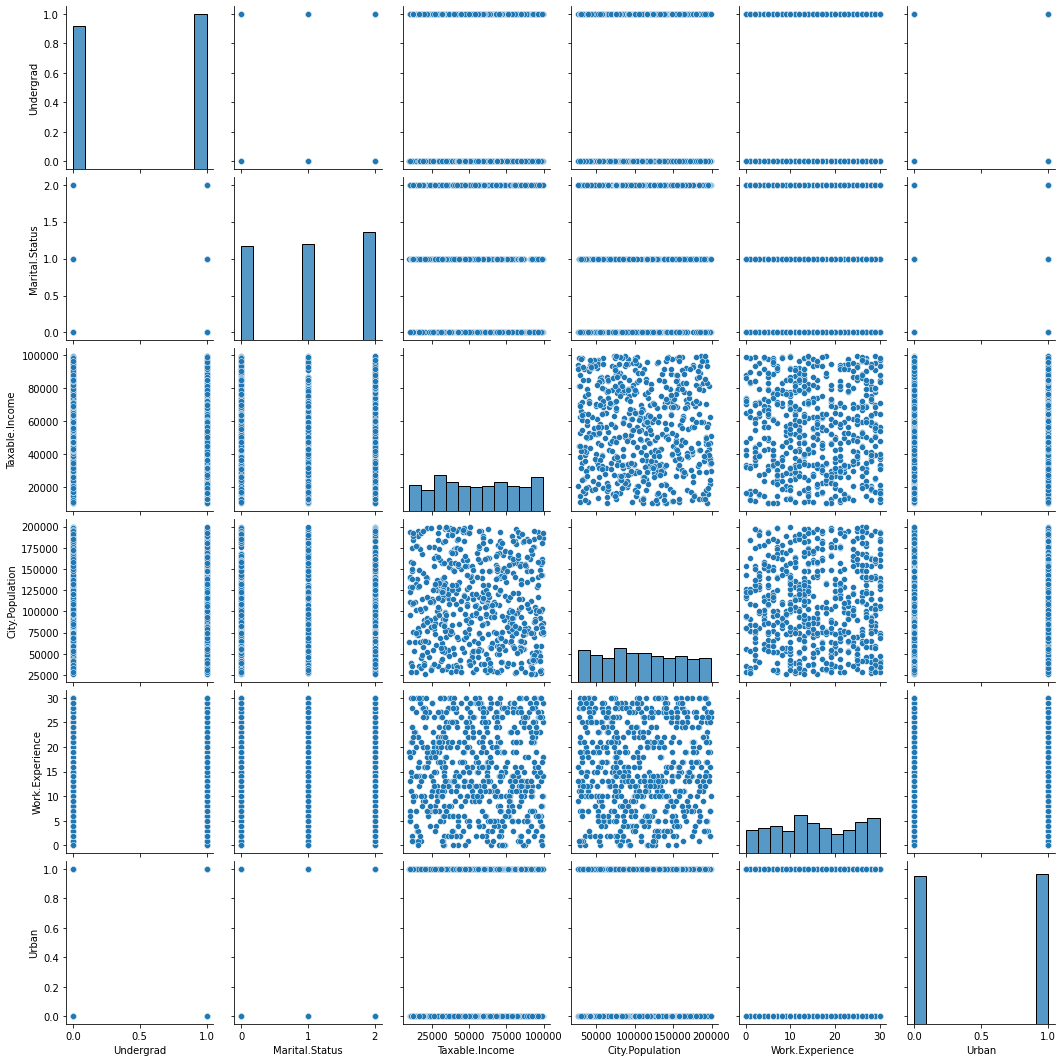

In [13]:
sns.pairplot(data1)

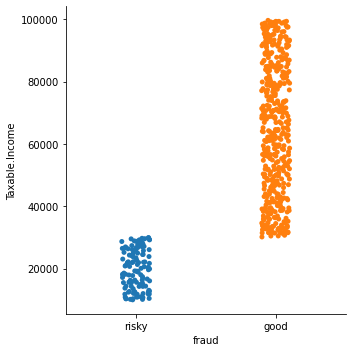

In [14]:
sns.catplot(x='fraud',y='Taxable.Income',data=data1)

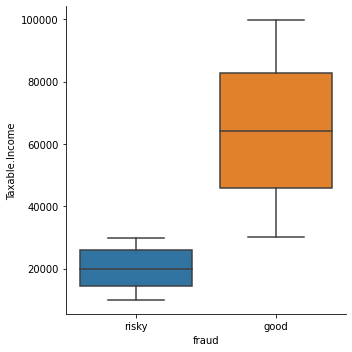

In [15]:
sns.catplot(x='fraud',y='Taxable.Income',data=data1,kind='box')

In [16]:
data1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'fraud'],
      dtype='object')

## Model Building

In [17]:
#Dividing the data into independent and dependent variable
X = data1.drop(['fraud'],axis=1)
y = data1['fraud']

In [18]:
#Splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [19]:
y_train.value_counts()

good     384
risky     96
Name: fraud, dtype: int64

### Model building by classifier method - categorical variable

In [20]:
#fitting Random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5, max_depth = 3,criterion ='entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=5)

In [21]:
#Model prediction
y_pred = classifier.predict(X_test)
y_pred

array(['good', 'good', 'good', 'good', 'risky', 'risky', 'good', 'risky',
       'risky', 'good', 'good', 'risky', 'risky', 'good', 'risky',
       'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky',
       'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'risky', 'risky', 'good', 'good',
       'good', 'good', 'risky', 'risky', 'good', 'good', 'good', 'risky',
       'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky',
       'good', 'good', 'good', 'good', 'good', 'risky', 'risk

In [22]:
y_test

159     good
307     good
253     good
528     good
137    risky
       ...  
102     good
577     good
18      good
560     good
62      good
Name: fraud, Length: 120, dtype: category
Categories (2, object): ['risky' < 'good']

In [23]:
#Model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print("Accuracy=", acc*100)

[[92  1]
 [ 0 27]]
Accuracy= 99.16666666666667


In [24]:
pd.DataFrame(index=X.columns,data=classifier.feature_importances_,columns=['Feature Importance']) 
#Only tax_income matters since our tree is based on it. 

,Feature Importance
Undergrad,0.000503
Marital.Status,0.005598
Taxable.Income,0.877142
City.Population,0.048415
Work.Experience,0.066384
Urban,0.001957


In [25]:
data1.columns.values[-1]

'fraud'

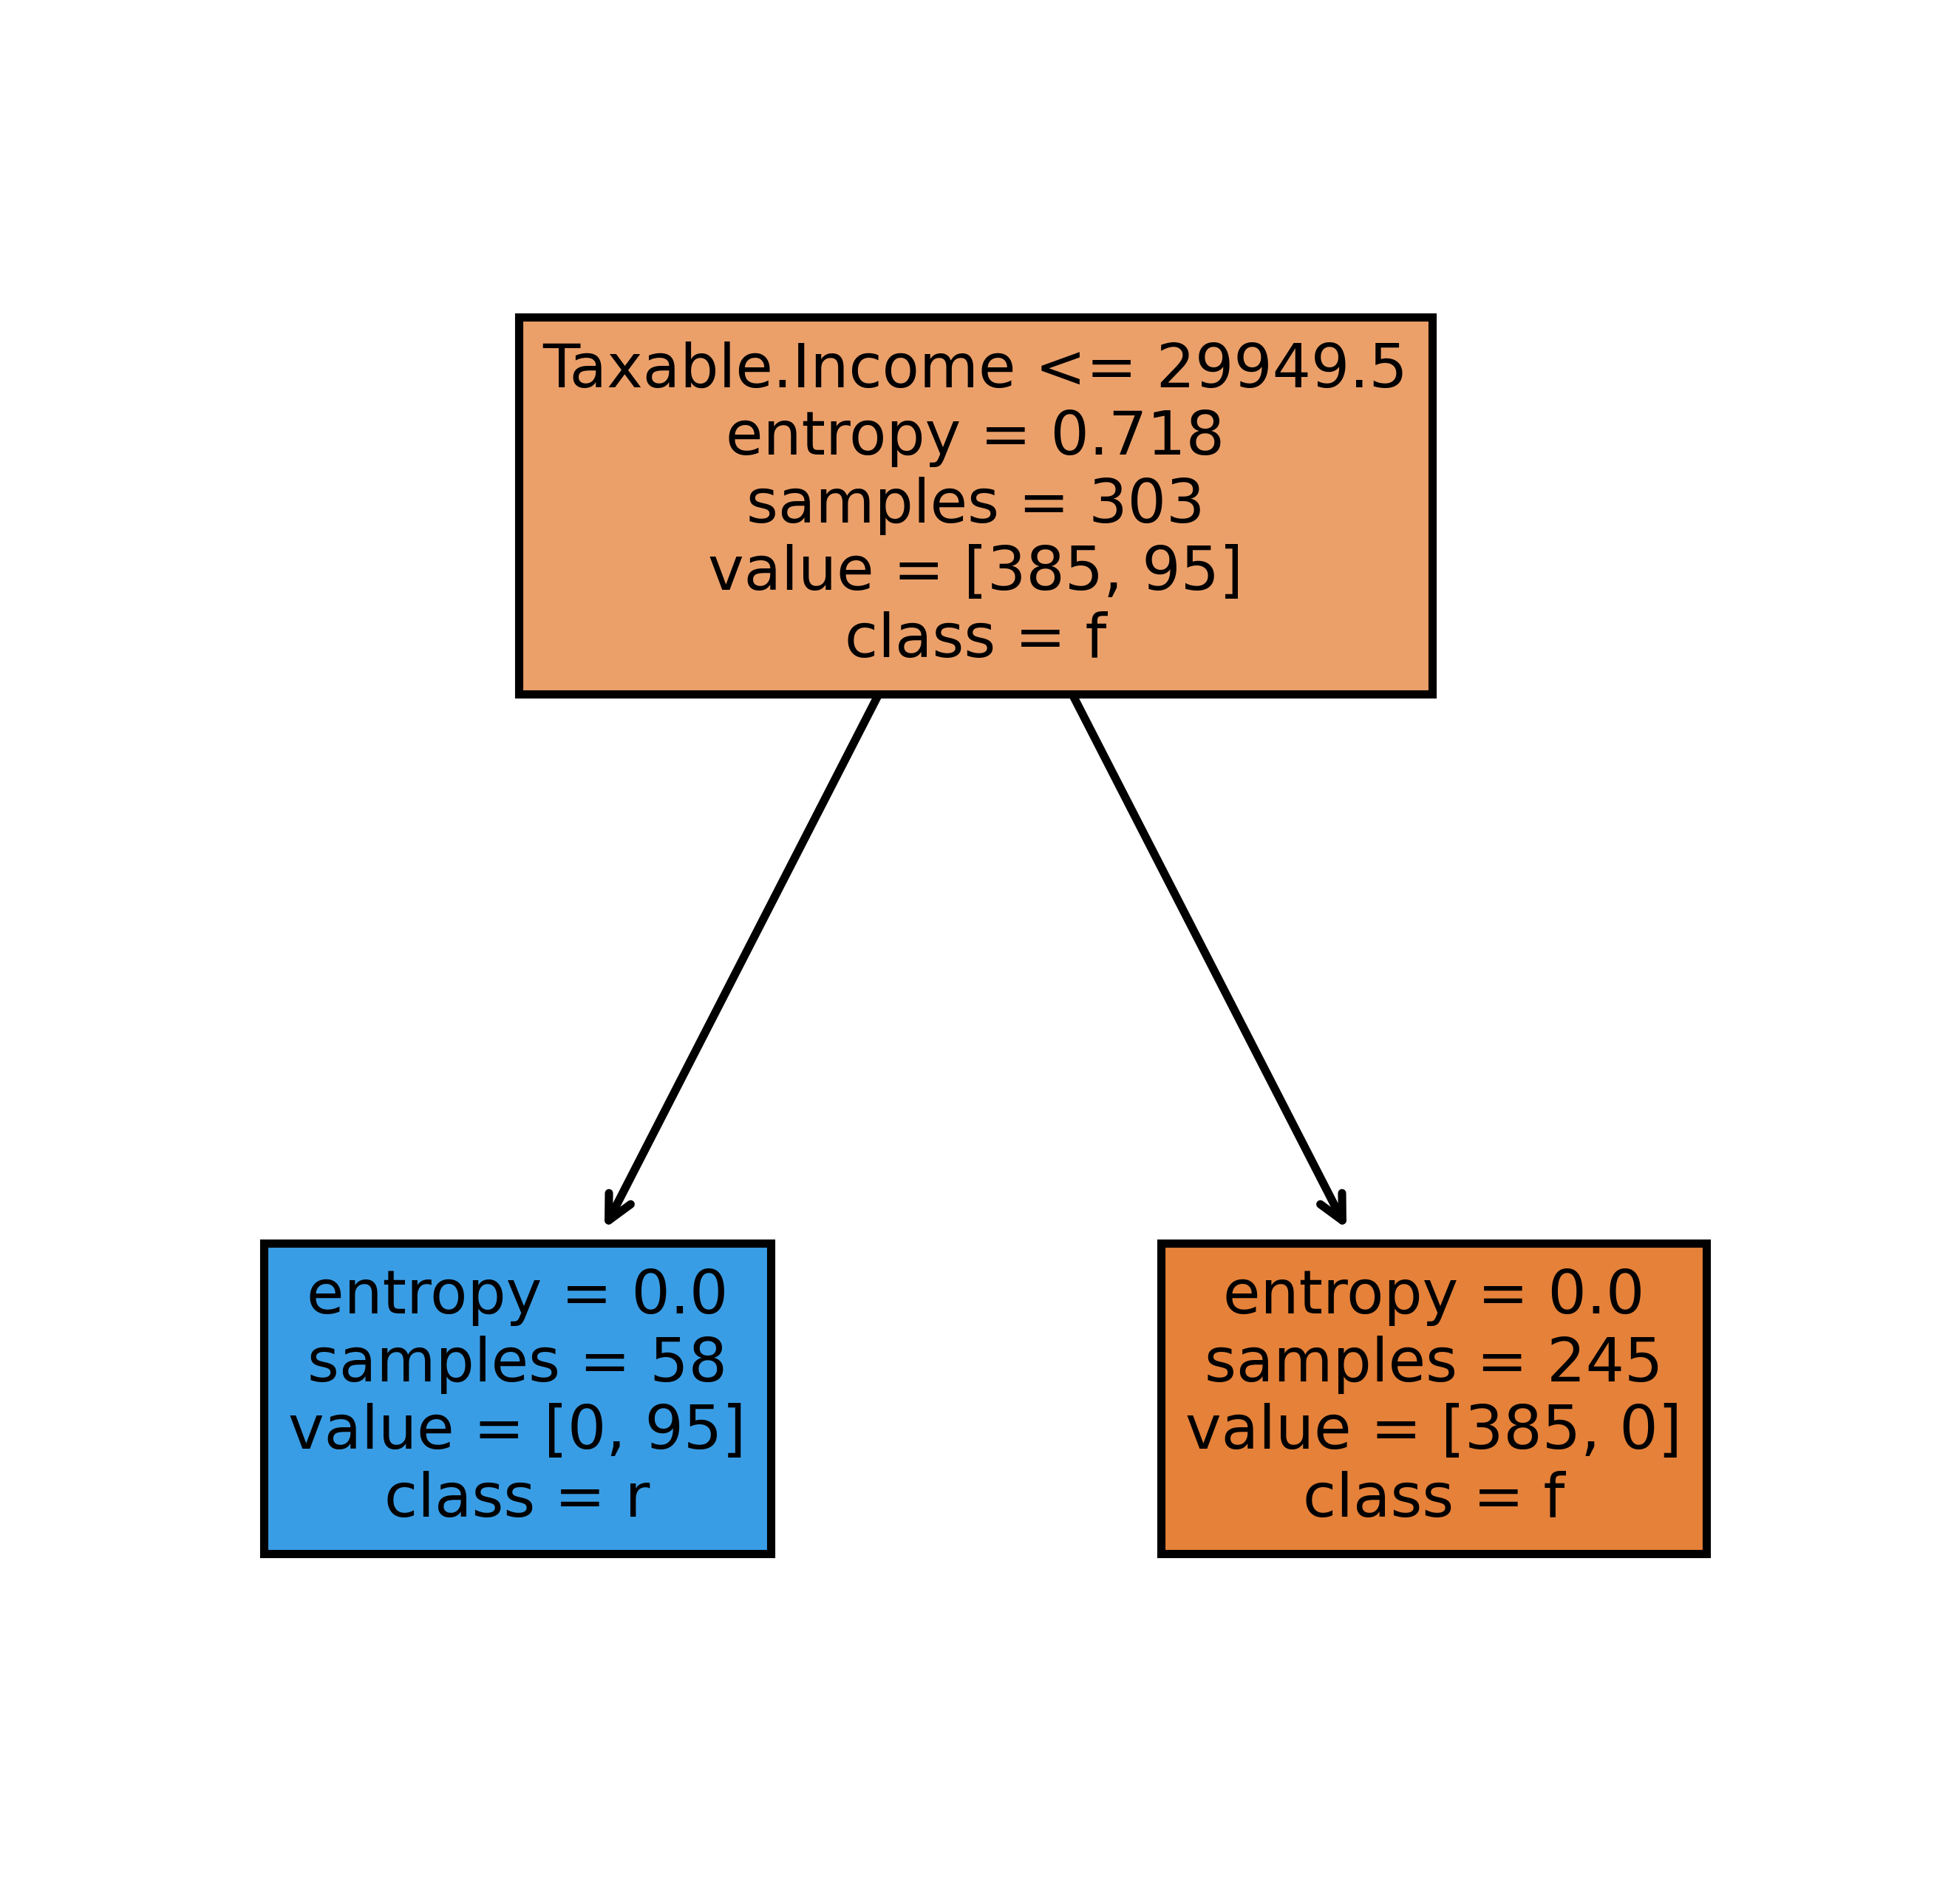

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree
fn=data1.columns.values[:-1]
cn=data1.columns.values[-1]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);